In [1]:
from acevedo_clss_and_fcns import * 
device = 'cpu'
if torch.cuda.is_available():
    torch.cuda.init()
    if torch.cuda.is_initialized():
        device = 'cuda:0'
#device = torch.device(device)
print(f"{device = }")
#loader_path = "./results/dataloaders/loader_Concen_plus_Fluxes.pt"
#loader = torch.load(loader_path)
#loader_validation = loader.get_validation_loader()
#loader_train = loader.get_train_loader()
#all_graphs_weights_df.to_parquet('./results/data/non_filtered_graphs_weights_from_explainer.parquet.gzip', compression = 'gzip')

all_graphs_weights_df = pd.read_parquet('./results/data/data_for_R/Non_masked_graphs_weights_from_explainer.parquet.gzip')

print(f"{all_graphs_weights_df.shape=}")

/DeepenData/.miniconda/envs/geo/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


device = 'cuda:0'
all_graphs_weights_df.shape=(38938, 4921)


((390, 4921), (38938,))

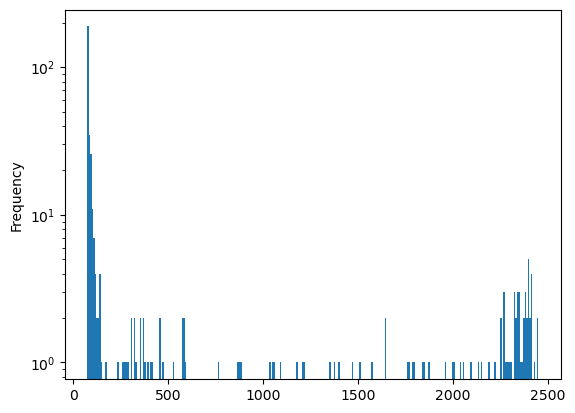

In [2]:

edge_mask = all_graphs_weights_df.sum(axis=1) > np.percentile(all_graphs_weights_df.sum(axis=1), 99)


filtered_graph_weights_df = all_graphs_weights_df.loc[  edge_mask, :]

filtered_graph_weights_df.sum(axis=1).plot.hist(logy = True, bins=300)
filtered_graph_weights_df.shape, edge_mask.shape

<AxesSubplot:ylabel='Frequency'>

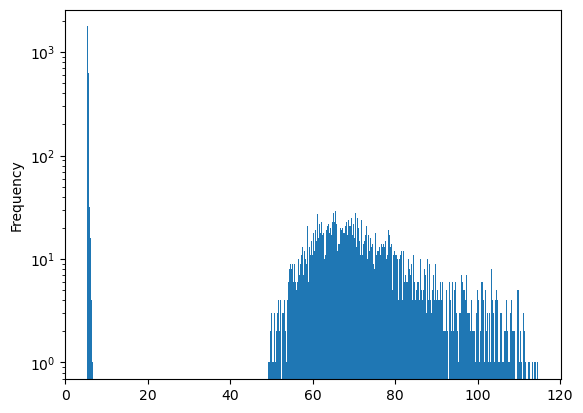

In [3]:
filtered_graph_weights_df.sum(axis=0).plot.hist(logy = True, bins=500)


In [4]:
train_labels = pd.read_csv("./results/data/data_for_R/Non_Masked_train_labels.csv").drop('Unnamed: 0', axis=1)['0']

filtered_graph_weights = filtered_graph_weights_df.transpose() #.columns = train_labels
filtered_graph_weights["Label"] = list(train_labels)

filtered_graph_weights.reset_index(drop=True, inplace=True)
filtered_graph_weights.columns = [str(col) for col in filtered_graph_weights.columns]
#filtered_graph_weights.to_parquet('./results/data/filtered_graph_weights.parquet.gzip', compression = 'gzip')
filtered_graph_weights

,161,172,515,516,799,963,1138,1139,1283,1284,...,37394,37722,37723,37993,37994,37995,38235,38388,38390,Label
0,0.011614,0.012449,0.010841,0.009146,0.011504,0.015456,0.013557,0.013448,0.007122,0.010307,...,0.008882,0.013686,0.013538,0.013519,0.013603,0.013392,0.013417,0.016928,0.018526,PKU
1,0.012127,0.011110,0.011814,0.010015,0.011552,0.013340,0.013566,0.013427,0.006397,0.009609,...,0.009186,0.015670,0.015414,0.013437,0.013524,0.013574,0.013381,0.016705,0.018211,PKU
2,0.015279,0.015181,0.016486,0.019487,0.015367,0.016228,0.014414,0.014742,0.021897,0.018235,...,0.020566,0.986138,0.010644,0.014325,0.014519,0.014433,0.010611,0.008758,0.007134,Control
3,0.017670,0.018134,0.019439,0.020649,0.017667,0.010163,0.015596,0.018706,0.026634,0.021405,...,0.020867,0.010063,0.004648,0.015471,0.015714,0.015266,0.016075,0.008303,0.006596,Control
4,0.011225,0.011879,0.011499,0.009553,0.011123,0.015017,0.013677,0.013352,0.007326,0.010766,...,0.008729,0.014841,0.014381,0.013417,0.013481,0.013639,0.013382,0.016559,0.018175,PKU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4916,0.018715,0.017803,0.021306,0.022674,0.019663,0.009753,0.014927,0.016216,0.030375,0.024370,...,0.023827,0.010548,0.006245,0.014694,0.014972,0.014532,0.014518,0.007615,0.008291,Control
4917,0.013917,0.036254,0.014627,0.014731,0.024745,0.012295,0.016807,0.038860,0.053260,0.038476,...,0.015032,0.015071,0.023729,0.016057,0.016736,0.015740,0.034531,0.014448,0.012564,Control
4918,0.025895,0.021730,0.024803,0.027482,0.021713,0.010688,0.013858,0.015353,0.037656,0.029716,...,0.029743,0.014862,0.011345,0.014026,0.014202,0.013800,0.013943,0.010110,0.014037,Control
4919,0.015294,0.014780,0.014350,0.015170,0.014034,0.012607,0.018108,0.024005,0.016603,0.015293,...,0.015221,0.025526,0.012005,0.017722,0.018839,0.017897,0.015708,0.012198,0.012326,Control


In [5]:
PYG_graph = torch.load("./results/graphs_from_PYG_and_NX/PYG_graph_Concen_plus_Fluxes.pt")


NX_graph  = nx.read_gpickle("./results/graphs_from_PYG_and_NX/grafo_nx_Concen_plus_Fluxes.gpickle")

In [6]:
edge_0_node_idxs =  PYG_graph.edge_index[0,:]
edge_1_node_idxs =  PYG_graph.edge_index[1,:]
edge_0_nodes     = [list(NX_graph.nodes)[i] for i in  edge_0_node_idxs]
edge_1_nodes     = [list(NX_graph.nodes)[i] for i in  edge_1_node_idxs]

In [7]:
edges_df = pd.DataFrame({'node1': edge_0_nodes, 'node2':edge_1_nodes})



edges_node_names_explainer_subgraphs = pd.concat([edges_df, all_graphs_weights_df], axis=1).loc[edge_mask,:]


In [8]:

edges_node_names_explainer_subgraphs.to_csv("./results/data/data_for_R/Non_masked_edges_node_names_explainer_subgraphs.csv")

In [9]:
pd.concat([edges_df, all_graphs_weights_df], axis=1).to_parquet("./results/data/data_for_R/Non_masked_ALL_edges_node_names_explainer_subgraphs.parquet.gzip", compression='gzip')